In [36]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report, log_loss, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv("Warriors_7_Seasons_Data.csv")
df['target'] = df['WL']
df['OPPONENT_TEAM'] = df['MATCHUP'].apply(lambda x: x.split()[-1])
df.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,BLK,TOV,PF,PLUS_MINUS,SEASON,DaysSinceLast,IS_HOME_GAME,INJURY_SCORE,target,OPPONENT_TEAM
0,12018,1610612744,GSW,Golden State Warriors,11800005,2018-09-29,GSW vs. MIN,0,241,110,...,8,17,23,-4.0,2018-19,0.0,1,-35.15,0,MIN
1,12018,1610612744,GSW,Golden State Warriors,11800039,2018-10-05,GSW vs. SAC,1,241,122,...,6,12,18,28.0,2018-19,6.0,1,-24.66,1,SAC
2,12018,1610612744,GSW,Golden State Warriors,11800054,2018-10-08,GSW vs. PHX,0,239,109,...,6,18,26,-8.0,2018-19,3.0,1,-124.33,0,PHX
3,12018,1610612744,GSW,Golden State Warriors,11800065,2018-10-10,GSW @ LAL,0,241,113,...,3,25,38,-10.0,2018-19,2.0,0,-53.67,0,LAL
4,12018,1610612744,GSW,Golden State Warriors,11800079,2018-10-12,GSW vs. LAL,0,241,105,...,4,16,30,-18.0,2018-19,2.0,1,-72.58,0,LAL


In [38]:
feature_cols = ['OPPONENT_TEAM', 'DaysSinceLast', 'SEASON', 'IS_HOME_GAME', 'INJURY_SCORE']
X = df[feature_cols]
y = df['target']


In [39]:
def preprocess_data(X):
    for col in X.select_dtypes(include=['object']).columns:
        X[col] = X[col].astype('category')
    return X

In [40]:
X = preprocess_data(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/tmp/ipykernel_8797/80136541.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category')
/tmp/ipykernel_8797/80136541.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category')


In [41]:
model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    enable_categorical=True,
    early_stopping_rounds=20,
    reg_alpha = 1,
    reg_lambda = 1
)

In [42]:
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.67125	validation_1-logloss:0.66961
[1]	validation_0-logloss:0.65583	validation_1-logloss:0.66428
[2]	validation_0-logloss:0.64248	validation_1-logloss:0.65976
[3]	validation_0-logloss:0.62848	validation_1-logloss:0.65875
[4]	validation_0-logloss:0.61825	validation_1-logloss:0.65517
[5]	validation_0-logloss:0.60725	validation_1-logloss:0.65366
[6]	validation_0-logloss:0.59876	validation_1-logloss:0.65282


/home/jrobbinsss/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:20:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	validation_0-logloss:0.58638	validation_1-logloss:0.65061
[8]	validation_0-logloss:0.57787	validation_1-logloss:0.65214
[9]	validation_0-logloss:0.56738	validation_1-logloss:0.65207
[10]	validation_0-logloss:0.55829	validation_1-logloss:0.64988
[11]	validation_0-logloss:0.55161	validation_1-logloss:0.64857
[12]	validation_0-logloss:0.54579	validation_1-logloss:0.64729
[13]	validation_0-logloss:0.53746	validation_1-logloss:0.64822
[14]	validation_0-logloss:0.52942	validation_1-logloss:0.64674
[15]	validation_0-logloss:0.52286	validation_1-logloss:0.64453
[16]	validation_0-logloss:0.51770	validation_1-logloss:0.64328
[17]	validation_0-logloss:0.51290	validation_1-logloss:0.64211
[18]	validation_0-logloss:0.50792	validation_1-logloss:0.64310
[19]	validation_0-logloss:0.50386	validation_1-logloss:0.64244
[20]	validation_0-logloss:0.49914	validation_1-logloss:0.64288
[21]	validation_0-logloss:0.49495	validation_1-logloss:0.64078
[22]	validation_0-logloss:0.49027	validation_1-logloss:0.6

/home/jrobbinsss/.local/lib/python3.10/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=20,
              enable_categorical=True, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [43]:
results = model.evals_result()

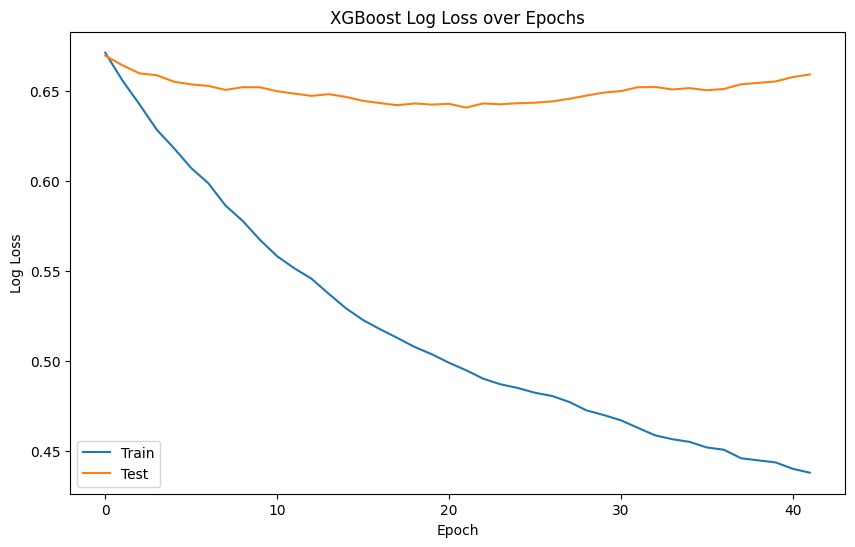

In [44]:
epochs = len(results['validation_0']['logloss'])
x_axis = range(epochs)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, results['validation_0']['logloss'], label='Train')
plt.plot(x_axis, results['validation_1']['logloss'], label='Test')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss over Epochs')
plt.legend()
plt.show()

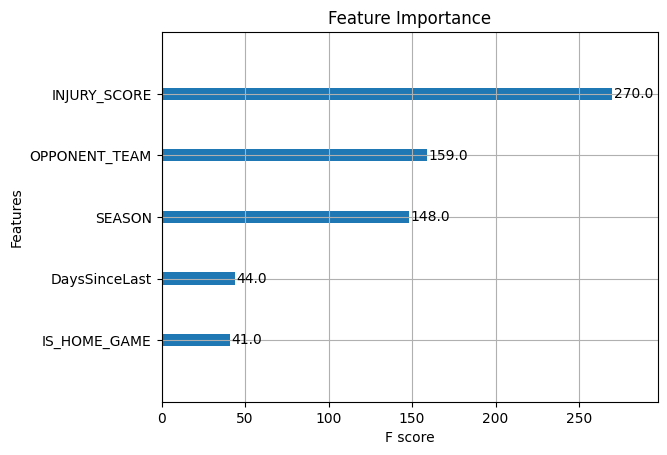

In [45]:
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

In [46]:
accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Accuracy: {accuracy}")

Accuracy: 0.6890756302521008


In [47]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.62      0.50      0.55        46
           1       0.72      0.81      0.76        73

    accuracy                           0.69       119
   macro avg       0.67      0.65      0.66       119
weighted avg       0.68      0.69      0.68       119



In [48]:
print(f"Log Loss: {log_loss(y_test, model.predict_proba(X_test))}")

Log Loss: 0.640780446967579


In [49]:
print(f"ROC-AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])}")

ROC-AUC: 0.6681060154854079


In [50]:
model.save_model('xgboost_model.json')

# Takeaways
- Model works decently well, although it says 68% accuracy, This is inflated due to us cutting the training short with "early_stopping_rounds=20", as this was the point where the model performed best before it started overfitting.
- Without this technique, we achieve a modest and good 58% prediction accuracy, which is good considering the randomness of sports.
- In the feature importance graph, we see Injury Score being very important for XGBoost to make decisions, with home court advantage actually mattering much less.
- Given our Log Loss score of 0.64, indicating that our model is making probabilistic predictions better than random, although it is not close to 0, which would indicate perfection.
- Given our ROC AUC score of 0.68, this further illustrats we are far from perfect, but perfection is impossible for sports predictions. You can make estimations on previous stats, but at the end of the day sports have variance and randomness by default.